# THE SPARK FOUNDATION

## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

### TASK - 2: PREDICTION USING UNSUPERVISED ML

#### From a given iris dataset, predict the optimum number of clusters and represent it visually

### Author: Purujit Dash


#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets



#### Importing the iris dataset

In [2]:
iris = pd.read_csv("P:\Internship\SPARK FOUNDATION\TASK 2\Iris.csv")
print("Data Imported")

Data Imported


#### To see the first 10 rows of the data

In [3]:
iris.head(10) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### To see the last 10 rows of the data

In [4]:
iris.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### The columns in the dataset:

In [5]:
print(iris.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [6]:
iris['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

#### Gathering intel about the dataset

In [7]:
iris.info()
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Dropping Id because Id is a discrete variable

In [8]:
iris=iris.drop(["Id"],axis=1)

#### The rows and columns of the dataset after dropping Id:

In [9]:
iris.shape

(150, 5)

#### Visualizing Species  using Pairplots

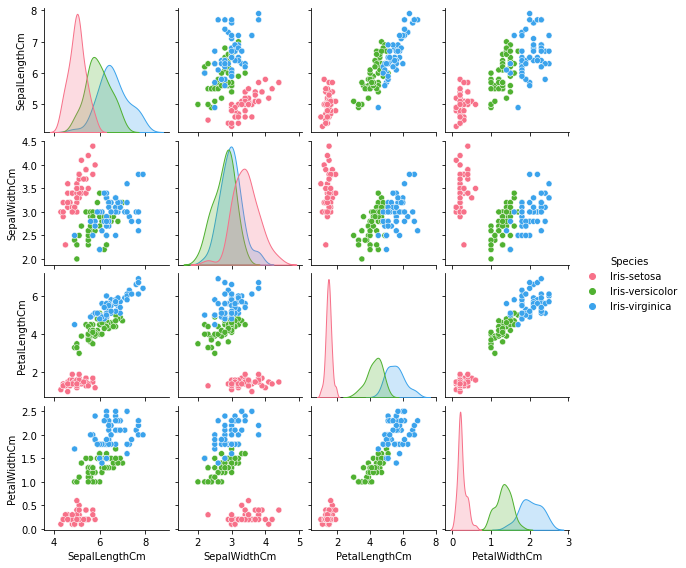

In [10]:
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')
sns.pairplot (iris, hue='Species', palette="husl", size=2)


#### Visualizing using Boxplots

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

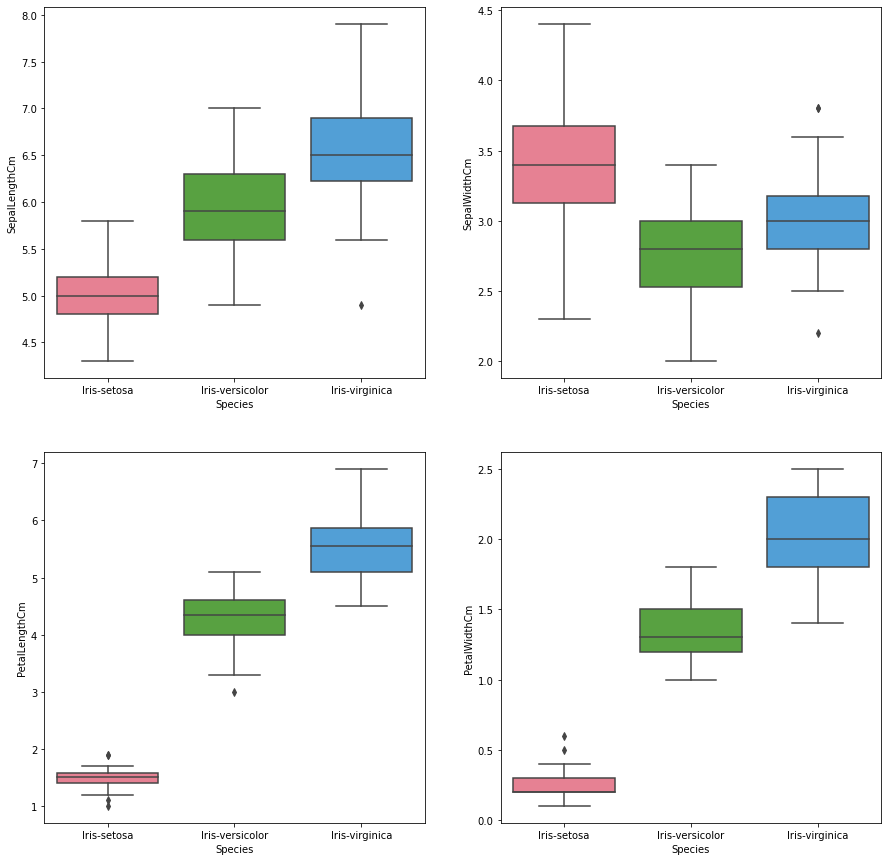

In [11]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.boxplot( x='Species', y='SepalLengthCm', data=iris, palette="husl")
plt.subplot(2,2,2)
sns.boxplot( x='Species', y='SepalWidthCm', data=iris, palette="husl")
plt.subplot(2,2,3)
sns.boxplot( x='Species', y='PetalLengthCm', data=iris, palette="husl")
plt.subplot(2,2,4)
sns.boxplot( x='Species', y='PetalWidthCm', data=iris, palette="husl")


#### Determining the Correlation Coefficent between variables

In [12]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Visualizing using Heatmaps

<AxesSubplot:>

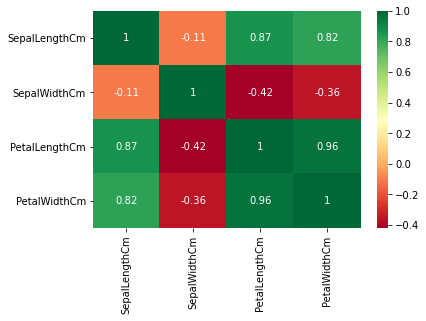

In [13]:
sns.heatmap(iris.corr(), annot=True, cmap="RdYlGn")

#### Find the optimal number of clusters for K Means, Using the Elbow method

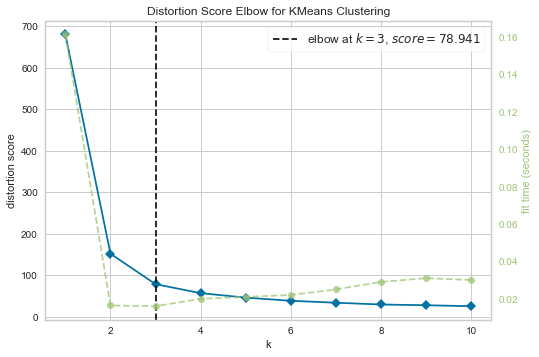

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
# Finding the optimum number of clusters for k-means classification
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
wcss = []

kmeans = KMeans()
x = iris.iloc[:, [0, 1, 2, 3]].values
visual=KElbowVisualizer(kmeans, k=(1,11))
visual.fit(x)
wcss.append(visual.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
visual.show()

##### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. 

##### From this we find the optimum number of clusters as **3**.

#### Implementing kmeans to the dataset 

In [15]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


#### Identifying the Centroids

In [16]:
centroids=kmeans.cluster_centers_
print(centroids)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


#### Visualising the clusters 

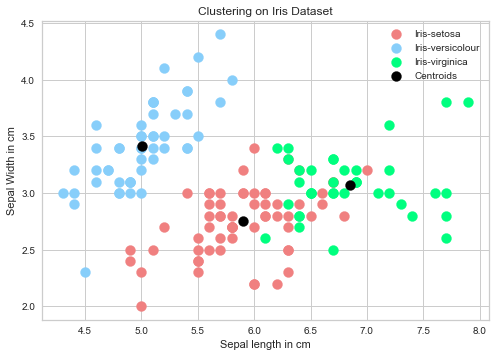

In [17]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'lightcoral', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'lightskyblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'springgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.title("Clustering on Iris Dataset")
plt.ylabel("Sepal Width in cm")
plt.xlabel("Sepal length in cm")
plt.legend()

#### Estmating the Accuracy of the clusters

In [18]:
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
eval=preprocessing.LabelEncoder()
iris.Species=eval.fit_transform(iris.Species)
y=iris.iloc[:,4].values
print(classification_report(y,y_kmeans))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.24       150
   macro avg       0.32      0.24      0.27       150
weighted avg       0.32      0.24      0.27       150



#### This means that the accuracy is 89%. It can be also understood that the average precision is 91% and the average recall is 89%

#### Therefore, the model is ***Highly Accurate.***

### **Thank you!!**